In [1]:
# prolect
!git clone https://github.com/Mike030668/Base_Fool_images.git -q

In [2]:
import sys
dir_project = '/content/Base_Fool_images'
sys.path.append(dir_project)
from scripts.consruct_game import Durack
from IPython.display import display, Image

# Play of robots on rules

In [3]:
def main():

    game = Durack(cards4player=6,  humans = 0, robots= 2,
                  img_path="Base_Fool_images/images",
                  img_save_path= "/content/temp_img.png",
                  make_gif= True,
                  print_out = True,  # logs
                  plot_game = False  # show online
                  )
    players, playdeck, trump = game.init_game()
    game.game_process.go_game(players, playdeck, trump)
    game.game_process.save_gif("game_play.gif", duration = 500)

if __name__ == "__main__":
    main()
    display(Image(data="game_play.gif", format='png'))

Output hidden; open in https://colab.research.google.com to view.

# Play of rand model instead human and robot on rules

In [4]:
import random
def main():

    def model():
       return random.randint(0, 9)
    model.__name__ = "random_model"

    game = Durack(cards4player=6,  humans = 1, robots= 1,
                  img_path="Base_Fool_images/images",
                  img_save_path= "/content/temp_img.png",
                  make_gif= True,
                  print_out = False, # logs
                  plot_game = False  # show online
                  )
    players, playdeck, trump = game.init_game()
    game.game_process.go_game(players, playdeck, trump, model)
    game.game_process.save_gif("game_play.gif", duration = 500)

if __name__ == "__main__":
    main()
    display(Image(data="game_play.gif", format='png'))

Output hidden; open in https://colab.research.google.com to view.

# Play human and robot on rules

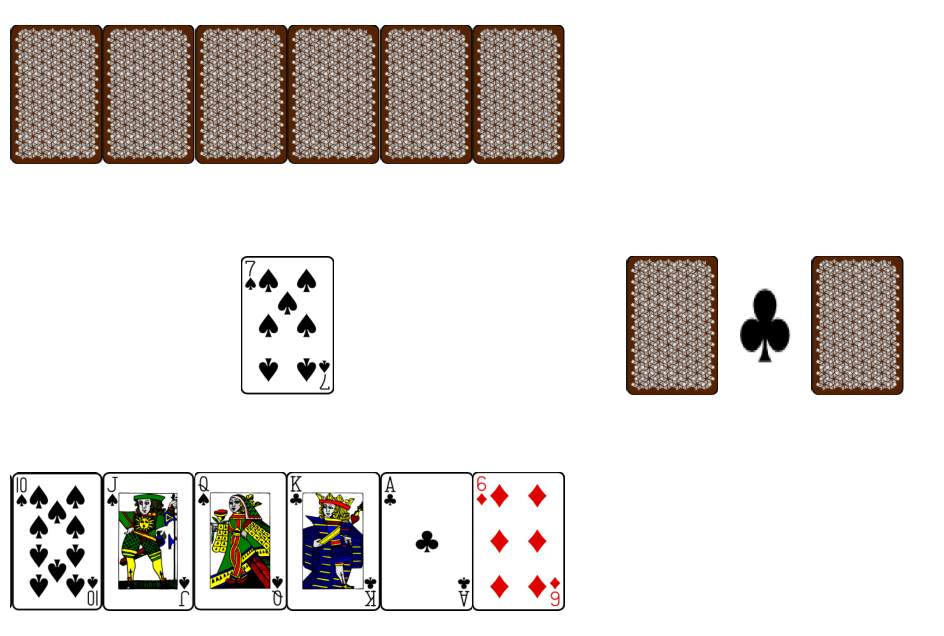

On the field: spades 7Player Human_1, your move, you have 2 attempts left current reward 0

Enter card number or zero to skip: stop
Player Human_1 stopped the game
Player Human_1 takes the card and skips the move
Victory for 

Checking cards
Human_1
          6  7  8  9  10  jack  queen  king   ace
hearts    0  0  0  0   0     0      0     0     0
spades    0  7  0  0  10    11     12     0     0
clubs     0  0  0  0   0     0      0  1300  1400
diamonds  6  0  0  0   0     0      0     0     0

Robot_1(min)
          6  7  8  9  10  jack  queen  king  ace
hearts    0  0  0  0  10     0      0    13   14
spades    0  0  0  0   0     0      0     0    0
clubs     0  0  0  0   0     0      0     0    0
diamonds  0  7  8  0   0    11      0     0    0

Checking other fields
Discard Pile
          6  7  8  9  10  jack  queen  king  ace
hearts    0  0  0  0   0     0      0     0    0
spades    0  0  0  9   0     0      0    13    0
clubs     0  0  0  0   0     0      0     0    0
diamonds 

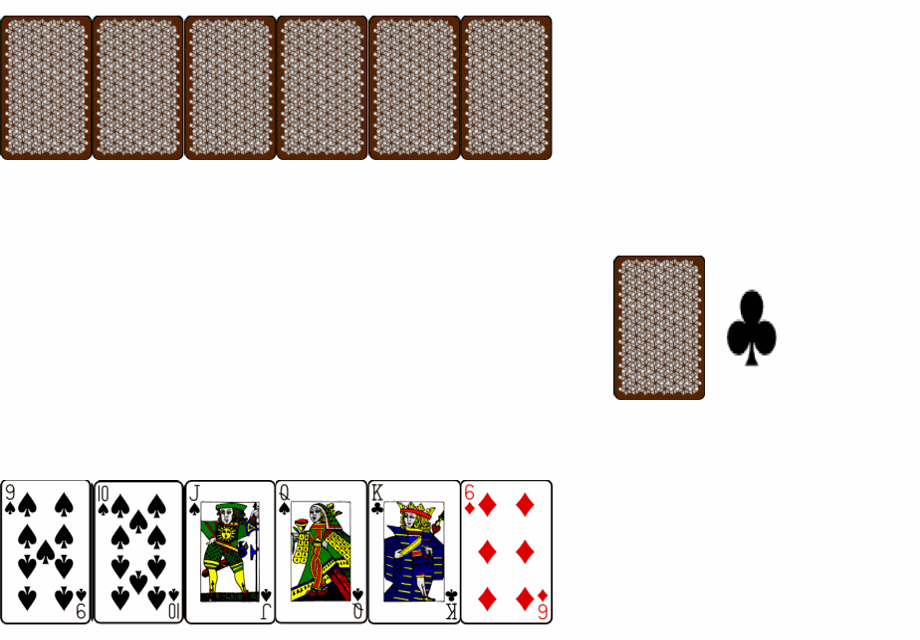

In [ ]:
import random
def main():

    game = Durack(cards4player=6,  humans = 1, robots= 1,
                  img_path="Base_Fool_images/images",
                  img_save_path= "/content/temp_img.png",
                  make_gif= True,
                  print_out = False, # logs
                  plot_game = True   # show online
                  )
    players, playdeck, trump = game.init_game()
    game.game_process.go_game(players, playdeck, trump)
    game.game_process.save_gif("game_play.gif", duration = 500)

if __name__ == "__main__":
    main()
    display(Image(data="game_play.gif", format='png'))

# Class for GYM env

The number of participants (robots and humans) should be in total not less than 2 and not more than 6
The number of humans is already set - 1
The number of robots is already set - 1
Trump suit is spadesThe number of participants (robots and humans) should be in total not less than 2 and not more than 6
The number of humans is already set - 1
The number of robots is already set - 1
Trump suit is clubs

FileNotFoundError: [Errno 2] No such file or directory: 'obs_img.png'

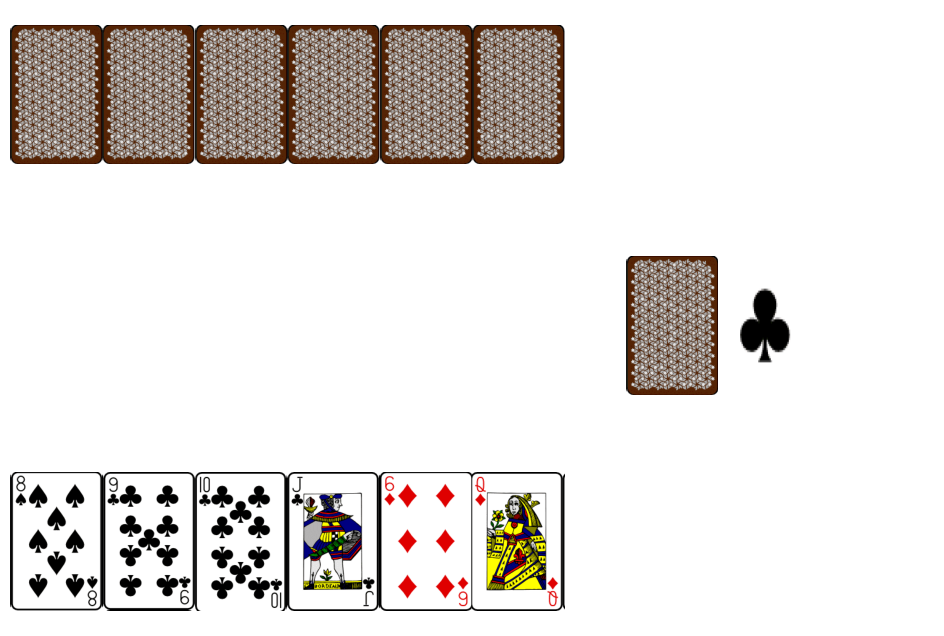

In [ ]:
import gym
from gym import spaces
import numpy as np
from IPython.display import Image, display
import random
import os
import matplotlib.pyplot as plt
import imageio
import PIL

class DurakEnv(gym.Env):
    def __init__(self, show_process=False, space_size=13, img_size=(256, 256),
                 img_save_path="obs_img.png"):

        self.game = Durack(cards4player=6, humans=1, robots=1,
                           img_path="Base_Fool_images/images",
                           img_save_path = img_save_path,
                           make_gif= False,
                           print_out = False,
                           plot_game = False
                           )

        self.players, self.playdeck, self.trump = self.game.init_game()
        self.action_space = spaces.Discrete(space_size)  # 12 cards + 1 for pass
        self.img_size = img_size
        self.observation_space = spaces.Box(low=0, high=255,
                                            shape=(img_size[0],img_size[1], 3),
                                            dtype=np.uint8)
        self.current_player = 0
        self.done = False
        self.show_process = show_process
        self.type_action = True  # True for step, False for answer
        self.frames = []
        self.img_save_path = img_save_path
        self.state_players = self.game.game_process.make_states(self.players)


    def reset(self):
        self.players, self.playdeck, self.trump = self.game.init_game()
        self.current_player = 0
        self.done = False
        self.type_action = True
        self.frames = []
        self.state_players = self.game.game_process.make_states(self.players)

        self.game.game_process.PLAY = True
        self.game.game_process.TRUMP = self.trump
        self.game.game_process.PLAY_DECK = self.playdeck
        self.game.game_process.START_DECK.loc[self.game.game_process.TRUMP] *= 100

        return self._get_state()

    def step(self, action):
        if self.done:
            return self._get_state(), 0, self.done, {}

        reward = 0
        if self.current_player == 0:  # Human player's turn
            action_model = action
        else:
            action_model = None

        player_type = self.game.game_process.get_type(self.players[self.current_player])

        self.players[self.current_player], self.state_players[self.current_player], step_reward = self.game.game_process.action_player(
            self.players[self.current_player], self.state_players[self.current_player], self.type_action, action_model)

        reward += step_reward
        self._post_step_updates()

        return self._get_state(), reward, self.done, {}

    def _post_step_updates(self):
        # Check if the game should continue
        if self.state_players[self.current_player][1]:
            self.done = True

        if self.game.game_process.GAME_FIELD.sum().sum() == 0:
            self.type_action = True
        else:
            self.type_action = False

        if (self.players[self.current_player] != 0).sum().sum() < self.game.game_process.CARDS_4PLAYER:
            razdacha_cards = Razdaza(self.game.game_process.PLAY_DECK,
                                     self.game.game_process.CARDS_4PLAYER,
                                     self.game.game_process.GAME_FIELD,
                                     self.game.game_process.BITA,
                                     self.game.game_process.START_DECK,
                                     self.game.PRINT_OUT
                                     )
            self.players, self.game.game_process.PLAY = razdacha_cards(self.players)

        self.current_player = (self.current_player + 1) % len(self.players)
        if self.state_players[self.current_player][1]:
            self.done = True

    def _get_state(self):
        self.game.game_process.display_game_state(
            self.players, self.game.game_process.GAME_FIELD, self.game.game_process.BITA, self.playdeck, self.trump)
        img = PIL.Image.open(self.img_save_path)

        if self.show_process:
            clear_output(True)
            plt.figure(figsize=self.game.game_process.fig_size)
            plt.imshow(img)
            plt.axis("off")
            plt.axis("tight")
            plt.axis("image")
            plt.show()

        img = img.convert("RGB")
        img = img.resize(self.img_size)
        img = np.array(img)

        self.frames.append(img)  # Save frame for GIF
        return img

    def save_gif(self, gif_path="game_play.gif", duration=300):
        imageio.mimsave(gif_path, self.frames, duration=duration)

    def _choose_card(self, card_idx):
        player_hand = self.game.game_process.show_cards(self.players[self.current_player], False)
        return player_hand[card_idx][0], player_hand[card_idx][1]

    def _is_done(self):
        return self.players[0].sum().sum() == 0 or self.players[1].sum().sum() == 0

    def _check_winner(self):
        return self.players[1].sum().sum() == 0

def main():
    def model():
        return random.randint(0, 12)  # Simulating a random action
    model.__name__ = "random_model"

    env = DurakEnv(show_process=False)
    obs = env.reset()
    done = False
    total_reward = 0

    while not done:
        # Display the observation image
        print()
        #img = PIL.Image.fromarray(obs, 'RGB')
        #display(img)
        action = model()  # Using model to simulate human action
        obs, reward, done, info = env.step(action)
        total_reward += reward
        print(f'Observation: {obs.shape}, Reward: {reward}, Done: {done}, Total Reward: {total_reward}')

    env.save_gif("game_play.gif", duration=500)
    display(Image(filename="game_play.gif"))

if __name__ == "__main__":
    main()
